In [28]:
from epengine.models.inference import SBEMInferenceRequestSpec

boston_lat = 42.3601
boston_lon = -71.0589
spec = SBEMInferenceRequestSpec(
    lat=boston_lat,
    lon=boston_lon,
    rotated_rectangle="POLYGON ((5 0, 5 10, 15 10, 15 0, 5 0))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=12,
    long_edge=12,
    num_floors=2,
    orientation=0.000,
    basement="none",
    attic="none",
    semantic_field_context={
        "Age_bracket": "btw_1975_2003",
        "AtticFloorInsulation": "Insulated",
        "AtticVentilation": "VentilatedAttic",
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "InsulatedWalls",
        "Cooling": "ACWindow",
        "DHW": "NaturalGasDHW",
        "Distribution": "AirDuctsConditionedUninsulated",
        "Equipment": "LowEfficiencyEquipment",
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "Heating": "NaturalGasCondensingHeating",
        "Lighting": "NoLED",
        "Region": "MA",
        "RoofInsulation": "InsulatedRoof",
        "Thermostat": "NoControls",
        "Typology": "SFH",
        "Walls": "FullInsulationWallsCavity",
        "Weatherization": "TightEnvelope",
        "Windows": "DoublePaneLowE",
    },
    source_experiment="ma-webapp/v3-20250524-134120",
    actual_conditioned_area_m2=12 * 12 * 2,
)
results = spec.run()
results.disaggregations_summary["Normalized"]["EndUse"].round().loc["50%"]
results.totals_summary["Normalized"]["EndUse"].round().loc["50%"]

np.float64(95.0)

Text(0, 0.5, 'F2F Height')

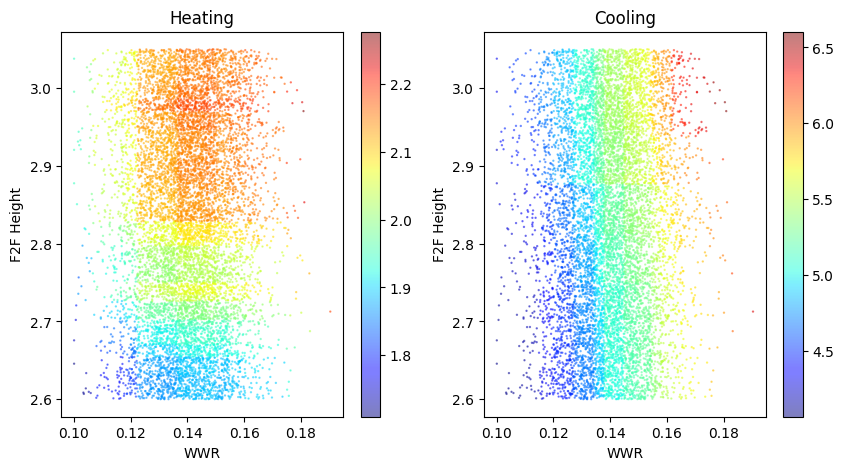

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

dataset = "Raw"
normalization = "Normalized"
data = results.disaggregations[normalization][dataset] / 12
heating = data["Heating"]
cooling = data["Cooling"]
wwr = results.features["feature.geometry.wwr"]
f2f_height = results.features["feature.geometry.f2f_height"]


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# ax[0].scatter(wwr, f2f_height, c=heating, cmap="jet", s=5, alpha=0.5)
# ax[1].scatter(wwr, f2f_height, c=cooling, cmap="jet", s=5, alpha=0.5)
heat_norm = Normalize(vmin=heating.min(), vmax=heating.max())
cool_norm = Normalize(vmin=cooling.min(), vmax=cooling.max())
plt.colorbar(
    ax[0].scatter(
        wwr, f2f_height, c=heating, cmap="jet", s=0.5, alpha=0.5, norm=heat_norm
    )
)
plt.colorbar(
    ax[1].scatter(
        wwr,
        f2f_height,
        c=cooling,
        cmap="jet",
        s=0.5,
        alpha=0.5,
        norm=cool_norm,
    )
)
ax[0].set_title("Heating")
ax[1].set_title("Cooling")
ax[0].set_xlabel("WWR")
ax[0].set_ylabel("F2F Height")
ax[1].set_xlabel("WWR")
ax[1].set_ylabel("F2F Height")

In [ ]:
dataset = "Raw"
normalization = "Normalized"
data = results.disaggregations[normalization][dataset] / 12
segments = data.columns.unique()

for f in results.features.columns:
    if len(results.features[f].unique()) > 1:
        fig, ax = plt.subplots(1, len(segments), figsize=(len(segments) * 5, 5))
        for i, segment in enumerate(segments):
            # ax[i].scatter(features[f], data[segment], s=0.5, alpha=0.5)
            ylim = data[segment].min() * 0.99, data[segment].max() * 1.01
            # ax[i].hist2d(results.features[f], data[segment], bins=100)
            ax[i].scatter(results.features[f], data[segment], s=0.2, alpha=0.2)
            ax[i].set_title(f)
            ax[i].set_xlabel(f)
            ax[i].set_ylabel(f"{segment}")
            ax[i].set_ylim(ylim)
        fig.tight_layout()
        plt.show()

## Savings Test

In [29]:
from epengine.models.inference import (
    SBEMInferenceRequestSpec,
    SBEMInferenceSavingsRequestSpec,
)

lat = 42.3601
lon = -71.0589
spec = SBEMInferenceRequestSpec(
    lat=lat,
    lon=lon,
    rotated_rectangle="POLYGON ((5 0, 5 10, 15 10, 15 0, 5 0))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=5,
    long_edge=10,
    num_floors=1,
    orientation=0.000,
    basement="none",
    attic="none",
    semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "MFH",
        "Age_bracket": "post_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        "Distribution": "AirDuctsInsulated",
        # equip/lights/etc
        "Equipment": "HighEfficiencyEquipment",
        "Lighting": "LED",
        "Thermostat": "Controls",
        # attics
        "AtticFloorInsulation": "Insulated",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "InsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "DoublePaneLowE",
    },
    # source_experiment="ma-webapp/test/v1-20250409-113831/iter-000/train/4/models",
    # source_experiment="ma-webapp/v0/iter-009/train/0/models",
    # source_experiment="ma-webapp/v0-20250407-171250",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-000/train/0/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-000/train/1/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-000/train/2/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-000/train/3/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-000/train/4/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-004/train/0/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-004/train/1/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-004/train/2/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-004/train/4/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-005/train/0/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-005/train/3/models",
    source_experiment="ma-webapp/v2-20250507-151630/iter-000/train/1/models",
    actual_conditioned_area_m2=220,
)

# results = spec.run(n=1000)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=spec,
    upgraded_semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "MFH",
        "Age_bracket": "post_2003",
        # sys
        "DHW": "HPWH",
        "Cooling": "ACCentral",
        "Heating": "ASHPHeating",
        "Distribution": "AirDuctsInsulated",
        # "DHW": "NaturalGasDHW",
        # "Cooling": "ACCentral",
        # "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "HighEfficiencyEquipment",
        "Lighting": "LED",
        "Thermostat": "Controls",
        # attics
        "AtticFloorInsulation": "Insulated",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "InsulatedCeiling",
        "BasementWallsInsulation": "InsulatedWalls",
        # env
        "GroundSlabInsulation": "InsulatedGroundSlab",
        "RoofInsulation": "HighlyInsulatedRoof",
        "Walls": "FullInsulationWallsCavityExterior",
        "Weatherization": "TightEnvelope",
        "Windows": "DoublePaneLowE",
        # "GroundSlabInsulation": "UninsulatedGroundSlab",
        # "RoofInsulation": "UninsulatedRoof",
        # "Walls": "UninsulatedWalls",
        # "Weatherization": "LeakyEnvelope",
        # "Windows": "SinglePane",
    },
)

results = savings_spec.run(n=20_000)
original_results = results["original"]
new_results = results["upgraded"]
delta_results = results["delta"]

No retrofit cost found for GroundSlabInsulation = UninsulatedGroundSlab -> InsulatedGroundSlab


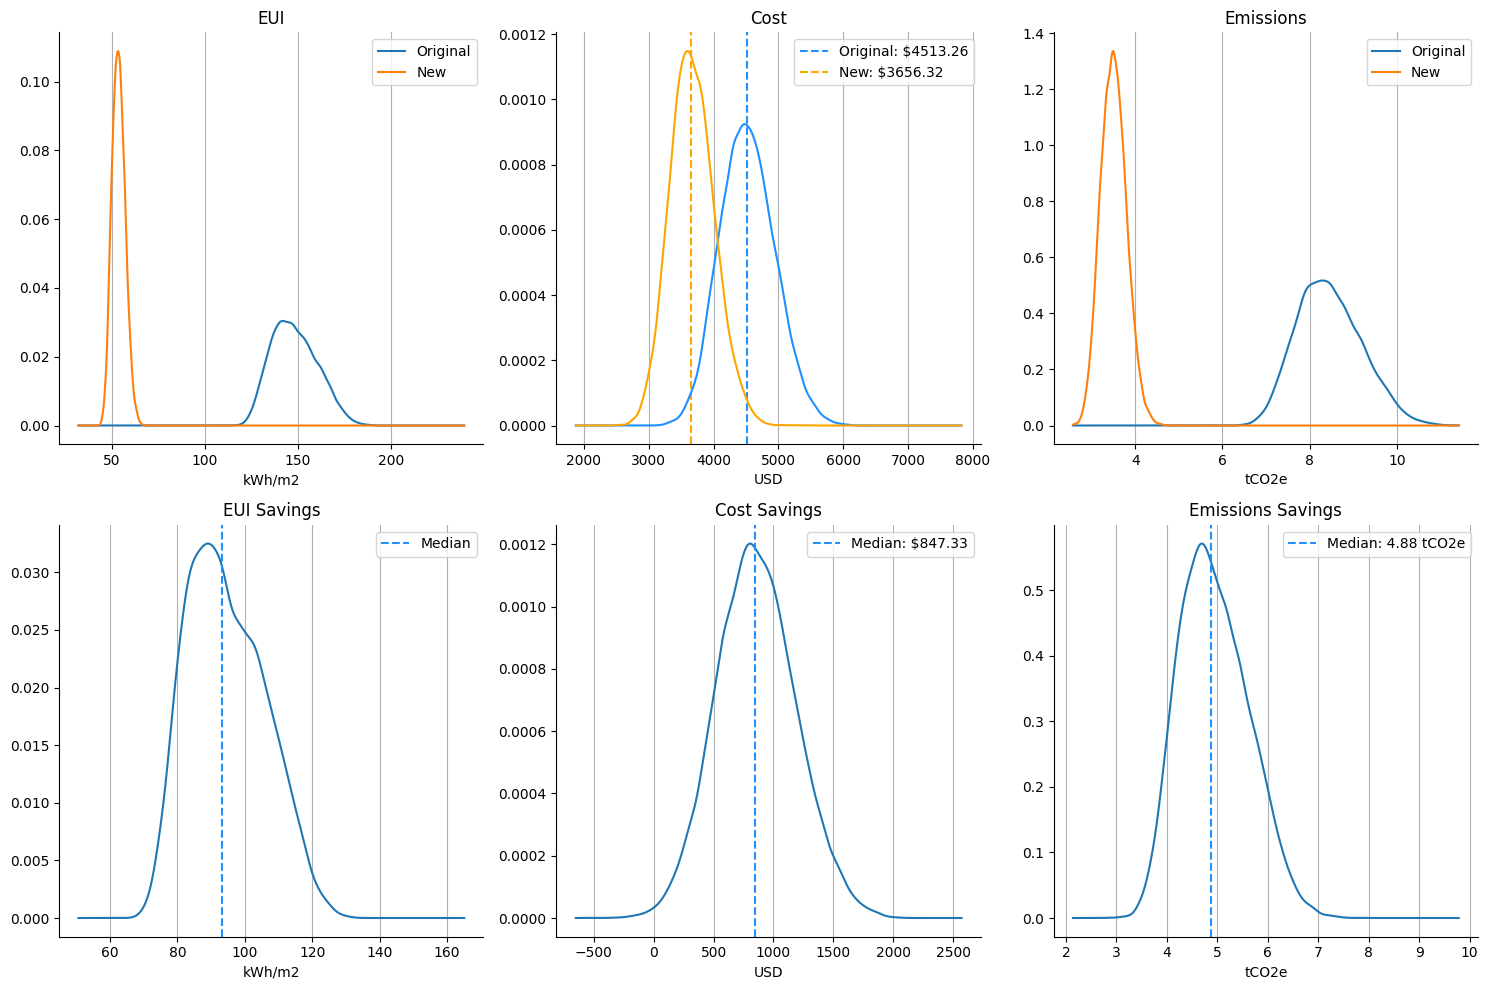

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
ax = axs[0]
original_eui_kde = gaussian_kde(original_results.totals["Normalized"]["Fuel"])
new_eui_kde = gaussian_kde(new_results.totals["Normalized"]["Fuel"])
min_eui = (
    min(
        original_results.totals["Normalized"]["Fuel"].min(),
        new_results.totals["Normalized"]["Fuel"].min(),
    )
    * 0.75
)
max_eui = (
    max(
        original_results.totals["Normalized"]["Fuel"].max(),
        new_results.totals["Normalized"]["Fuel"].max(),
    )
    * 1.25
)
x = np.linspace(min_eui, max_eui, 1000)
original_eui_pdf = original_eui_kde(x)
new_eui_pdf = new_eui_kde(x)
ax[0].plot(x, original_eui_pdf, label="Original")
ax[0].plot(x, new_eui_pdf, label="New")
ax[0].legend()

ax[0].set_title("EUI")
ax[0].set_xlabel("kWh/m2")

original_cost_kde = gaussian_kde(original_results.totals["Gross"]["EndUseCost"])
new_cost_kde = gaussian_kde(new_results.totals["Gross"]["EndUseCost"])
min_cost = (
    min(
        original_results.totals["Gross"]["EndUseCost"].min(),
        new_results.totals["Gross"]["EndUseCost"].min(),
    )
    * 0.75
)
max_cost = (
    max(
        original_results.totals["Gross"]["EndUseCost"].max(),
        new_results.totals["Gross"]["EndUseCost"].max(),
    )
    * 1.25
)
x = np.linspace(min_cost, max_cost, 1000)
original_cost_pdf = original_cost_kde(x)
new_cost_pdf = new_cost_kde(x)
ax[1].axvline(
    original_results.totals["Gross"]["EndUseCost"].median(),
    linestyle="--",
    color="dodgerblue",
    label=f"Original: ${original_results.totals['Gross']['EndUseCost'].median():.2f}",
)
ax[1].axvline(
    new_results.totals["Gross"]["EndUseCost"].median(),
    linestyle="--",
    color="orange",
    label=f"New: ${new_results.totals['Gross']['EndUseCost'].median():.2f}",
)
ax[1].plot(
    x,
    original_cost_pdf,
    color="dodgerblue",
)
ax[1].plot(x, new_cost_pdf, color="orange")
ax[1].legend()
# original_results.totals["Gross"]["Cost"].hist(ax=ax[1])
# new_results.totals["Gross"]["Cost"].hist(ax=ax[1])
ax[1].set_title("Cost")
ax[1].set_xlabel("USD")

original_emissions_kde = gaussian_kde(original_results.totals["Gross"]["FuelEmissions"])
new_emissions_kde = gaussian_kde(new_results.totals["Gross"]["FuelEmissions"])
min_emissions = min(
    original_results.totals["Gross"]["FuelEmissions"].min(),
    new_results.totals["Gross"]["FuelEmissions"].min(),
)
max_emissions = max(
    original_results.totals["Gross"]["FuelEmissions"].max(),
    new_results.totals["Gross"]["FuelEmissions"].max(),
)
x = np.linspace(min_emissions, max_emissions, 1000)
original_emissions_pdf = original_emissions_kde(x)
new_emissions_pdf = new_emissions_kde(x)
ax[2].plot(x, original_emissions_pdf, label="Original")
ax[2].plot(x, new_emissions_pdf, label="New")
ax[2].legend()
ax[2].set_title("Emissions")
ax[2].set_xlabel("tCO2e")

ax = axs[1]
eui_savings = (
    original_results.totals["Normalized"]["Fuel"]
    - new_results.totals["Normalized"]["Fuel"]
)
eui_savings_kde = gaussian_kde(eui_savings)
min_eui_savings = eui_savings.min() * (1.25 if eui_savings.min() < 0 else 0.75)
max_eui_savings = eui_savings.max() * (1.25 if eui_savings.max() > 0 else 0.75)
x = np.linspace(min_eui_savings, max_eui_savings, 1000)
eui_savings_pdf = eui_savings_kde(x)
ax[0].plot(x, eui_savings_pdf)
ax[0].axvline(
    eui_savings.median(),
    linestyle="--",
    color="dodgerblue",
    label="Median",
)
ax[0].legend()
ax[0].set_title("EUI Savings")
ax[0].set_xlabel("kWh/m2")

cost_savings = (
    original_results.totals["Gross"]["EndUseCost"]
    - new_results.totals["Gross"]["EndUseCost"]
)
cost_savings_kde = gaussian_kde(cost_savings)
min_cost_savings = cost_savings.min() * (1.25 if cost_savings.min() < 0 else 0.75)
max_cost_savings = cost_savings.max() * (1.25 if cost_savings.max() > 0 else 0.75)
x = np.linspace(min_cost_savings, max_cost_savings, 1000)
cost_savings_pdf = cost_savings_kde(x)
ax[1].plot(x, cost_savings_pdf)
ax[1].axvline(
    cost_savings.median(),
    linestyle="--",
    color="dodgerblue",
    label=f"Median: ${cost_savings.median():.2f}",
)
ax[1].legend()
ax[1].set_title("Cost Savings")
ax[1].set_xlabel("USD")

emissions_savings = (
    original_results.totals["Gross"]["FuelEmissions"]
    - new_results.totals["Gross"]["FuelEmissions"]
)
emissions_savings_kde = gaussian_kde(emissions_savings)
min_emissions_savings = emissions_savings.min() * (
    1.25 if emissions_savings.min() < 0 else 0.75
)
max_emissions_savings = emissions_savings.max() * (
    1.25 if emissions_savings.max() > 0 else 0.75
)
x = np.linspace(min_emissions_savings, max_emissions_savings, 1000)
emissions_savings_pdf = emissions_savings_kde(x)
ax[2].plot(x, emissions_savings_pdf)
ax[2].axvline(
    emissions_savings.median(),
    linestyle="--",
    color="dodgerblue",
    label=f"Median: {emissions_savings.median():.2f} tCO2e",
)
ax[2].legend()
ax[2].set_title("Emissions Savings")
ax[2].set_xlabel("tCO2e")

# turn off all right and top spines
for i in range(2):
    for j in range(3):
        axs[i, j].spines["right"].set_visible(False)
        axs[i, j].spines["top"].set_visible(False)
        axs[i, j].grid(axis="x")

fig.tight_layout()

## Experiment Fold Comparisons

In [21]:
from tqdm.autonotebook import tqdm

from epengine.models.inference import (
    SBEMInferenceRequestSpec,
    SBEMInferenceSavingsRequestSpec,
)

lat = 42.3601
lon = -71.0589
experiment_names = [
    # "ma-webapp/v4-20250814-163347/iter-000/train/0/models",
    # "ma-webapp/v4-20250814-163347/iter-000/train/1/models",
    # "ma-webapp/v4-20250814-163347/iter-000/train/2/models",
    # "ma-webapp/v4-20250814-163347/iter-000/train/3/models",
    # "ma-webapp/v4-20250814-163347/iter-000/train/4/models",
    # "ma-webapp/v4-20250814-163347/iter-001/train/0/models",
    # "ma-webapp/v4-20250814-163347/iter-001/train/1/models",
    # "ma-webapp/v4-20250814-163347/iter-001/train/2/models",
    # "ma-webapp/v4-20250814-163347/iter-001/train/3/models",
    # "ma-webapp/v4-20250814-163347/iter-001/train/4/models",
    # "ma-webapp/v4-20250814-163347/iter-002/train/0/models",
    # "ma-webapp/v4-20250814-163347/iter-002/train/1/models",
    # "ma-webapp/v4-20250814-163347/iter-002/train/2/models",
    # "ma-webapp/v4-20250814-163347/iter-002/train/3/models",
    # "ma-webapp/v4-20250814-163347/iter-002/train/4/models",
    "ma-webapp/v4-20250814-163347/iter-003/train/0/models",
    # "ma-webapp/v4-20250814-163347/iter-003/train/1/models",
    # "ma-webapp/v4-20250814-163347/iter-003/train/2/models",
    # "ma-webapp/v4-20250814-163347/iter-003/train/3/models",
    # "ma-webapp/v4-20250814-163347/iter-003/train/4/models",
]
results = {}
for experiment_name in tqdm(experiment_names):
    spec = SBEMInferenceRequestSpec(
        lat=lat,
        lon=lon,
        rotated_rectangle="POLYGON ((5 0, 5 10, 15 10, 15 0, 5 0))",
        neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
        neighbor_floors=[3],
        short_edge=5,
        long_edge=10,
        num_floors=2,
        orientation=1.9,
        basement="occupied_unconditioned",
        attic="unoccupied_unconditioned",
        semantic_field_context={
            # constant
            "Region": "MA",
            "Typology": "SFH",
            "Age_bracket": "pre_1975",
            # sys
            "DHW": "NaturalGasDHW",
            "Cooling": "ACCentral",
            "Heating": "OilHeating",
            "Distribution": "Steam",
            # equip/lights/etc
            "Equipment": "HighEfficiencyEquipment",
            "Lighting": "LED",
            "Thermostat": "Controls",
            # attics
            "AtticFloorInsulation": "Insulated",
            "AtticVentilation": "VentilatedAttic",
            # basement
            "BasementCeilingInsulation": "UninsulatedCeiling",
            "BasementWallsInsulation": "UninsulatedWalls",
            # env
            "GroundSlabInsulation": "UninsulatedGroundSlab",
            "RoofInsulation": "UninsulatedRoof",
            "Walls": "SomeInsulationWalls",
            "Weatherization": "SomewhatLeakyEnvelope",
            "Windows": "SinglePane",
        },
        source_experiment=experiment_name,
        actual_conditioned_area_m2=220,
    )

    # results = spec.run(n=1000)
    savings_spec = SBEMInferenceSavingsRequestSpec(
        original=spec,
        upgraded_semantic_field_context={
            # constant
            "Region": "MA",
            "Typology": "SFH",
            "Age_bracket": "pre_1975",
            # sys
            "DHW": "NaturalGasDHW",
            "Cooling": "ACCentral",
            "Heating": "OilHeating",
            "Distribution": "Steam",
            # equip/lights/etc
            "Equipment": "HighEfficiencyEquipment",
            "Lighting": "LED",
            "Thermostat": "Controls",
            # attics
            "AtticFloorInsulation": "Insulated",
            "AtticVentilation": "VentilatedAttic",
            # basement
            "BasementCeilingInsulation": "UninsulatedCeiling",
            "BasementWallsInsulation": "UninsulatedWalls",
            # env
            "GroundSlabInsulation": "UninsulatedGroundSlab",
            "RoofInsulation": "UninsulatedRoof",
            "Walls": "FullInsulationWallsCavityExterior",
            "Weatherization": "TightEnvelope",
            "Windows": "SinglePane",
        },
        # {
        #     # constant
        #     "Region": "MA",
        #     "Typology": "SFH",
        #     "Age_bracket": "pre_1975",
        #     # sys
        #     # "DHW": "HPWH",
        #     # "Cooling": "ACCentral",
        #     # "Heating": "ASHPHeating",
        #     # "Distribution": "Steam",
        #     "DHW": "NaturalGasDHW",
        #     "Cooling": "ACCentral",
        #     "Heating": "NaturalGasHeating",
        #     "Distribution": "Steam",
        #     # equip/lights/etc
        #     "Equipment": "HighEfficiencyEquipment",
        #     "Lighting": "LED",
        #     "Thermostat": "Controls",
        #     # attics
        #     "AtticFloorInsulation": "Insulated",
        #     "AtticVentilation": "VentilatedAttic",
        #     # basement
        #     "BasementCeilingInsulation": "InsulatedCeiling",
        #     "BasementWallsInsulation": "InsulatedWalls",
        #     # env
        #     "GroundSlabInsulation": "UninsulatedGroundSlab",
        #     "RoofInsulation": "UninsulatedRoof",
        #     "Walls": "FullInsulationWallsCavity",
        #     "Weatherization": "TightEnvelope",
        #     "Windows": "DoublePaneLowE",
        #     # "GroundSlabInsulation": "UninsulatedGroundSlab",
        #     # "RoofInsulation": "UninsulatedRoof",
        #     # "Walls": "UninsulatedWalls",
        #     # "Weatherization": "LeakyEnvelope",
        #     # "Windows": "SinglePane",
        # },
    )

    results[experiment_name] = savings_spec.run(n=20_000)

  0%|          | 0/1 [00:00<?, ?it/s]

---- ORIGINAL ----
97.39112971541213
33.68026253741466
---- UPGRADED ----
50.69934376215162
34.014727045960136


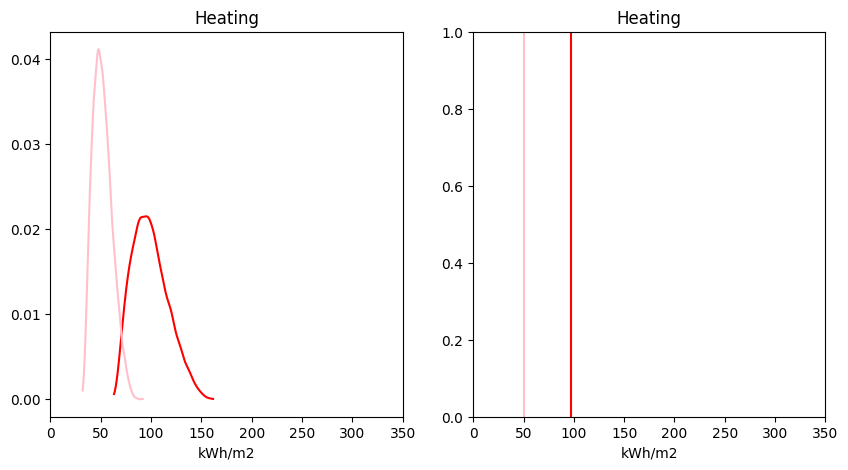

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

color_map = {
    # "iter-000": "dodgerblue",
    # "iter-001": "orange",
    # "iter-004": "green",
    "iter-003": "red",
}
color_map_savings = {
    # "iter-000": "dodgerblue",
    # "iter-001": "orange",
    # "iter-004": "green",
    "iter-003": "pink",
}
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for label, res in results.items():
    original_results = res["original"]
    heating = original_results.disaggregations.Normalized.EndUse.Heating
    cooling = original_results.disaggregations.Normalized.EndUse.Cooling
    heating_kde = gaussian_kde(heating)
    x = np.linspace(heating.min(), heating.max(), 1000)
    heating_pdf = heating_kde(x)
    label = next(filter(lambda x: x in label, color_map.keys()))
    color = color_map[label]
    ax = axs[0]
    ax.plot(x, heating_pdf, color=color, label=label)
    ax = axs[1]
    ax.axvline(heating.median(), color=color, label=label)
    print("---- ORIGINAL ----")
    print(heating.median())
    print(cooling.median())


for label, res in results.items():
    original_results = res["upgraded"]
    heating = original_results.disaggregations.Normalized.EndUse.Heating
    cooling = original_results.disaggregations.Normalized.EndUse.Cooling
    heating_kde = gaussian_kde(heating)
    x = np.linspace(heating.min(), heating.max(), 1000)
    heating_pdf = heating_kde(x)
    label = next(filter(lambda x: x in label, color_map_savings.keys()))
    color = color_map_savings[label]
    ax = axs[0]
    ax.plot(x, heating_pdf, color=color, label=label)
    ax = axs[1]
    ax.axvline(heating.median(), color=color, label=label)
    print("---- UPGRADED ----")
    print(heating.median())
    print(cooling.median())

for ax in axs:
    ax.set_title("Heating")
    ax.set_xlabel("kWh/m2")
    ax.set_xlim(0, 350)

In [14]:
original_results.totals_summary.Normalized.EndUse

mean    158.628163
std      21.004687
min     112.518452
5%      128.617579
10%     132.818950
25%     142.070766
50%     156.096005
75%     173.739525
90%     188.579131
95%     195.934188
max     236.609794
Name: EndUse, dtype: float64

In [ ]:
delta_results.serialized

In [ ]:
delta_results.totals_summary["Gross"]["Cost"].astype(int)

In [ ]:
delta_results.totals_summary["Gross"]["Cost"].astype(int)

# Scratchpad for Retrofit Cost Testing

In [1]:
# basement upgrade
# depends on single floor facade area and footprint area and source feature for basements.
# carry two factors: one for floor or ceiling cost (which may be 0) and one for wall cost (which may be 0)

"""
unoccupied uninsulated ceiling to occupied insulated walls insulated ceiling: (1+1.83+3.5+1.26)
occupied uninsulated ceiling uninsulated floors to occupied insulated walls insulated ceiling: (1+1.83+3.5+1.26)
"""

'\nunoccupied uninsulated ceiling to occupied insulated walls insulated ceiling: (1+1.83+3.5+1.26)\noccupied uninsulated ceiling uninsulated floors to occupied insulated walls insulated ceiling: (1+1.83+3.5+1.26)\n'

In [1]:
from pydantic import BaseModel, Field, RootModel


class OldCostFactors(BaseModel):
    """The cost factors for an intervention."""

    per_roof_area: float = Field(..., description="The cost per roof area [$/m2].")
    per_facade_area: float = Field(..., description="The cost per facade area [$/m2].")
    per_window_area: float = Field(..., description="The cost per window area [$/m2].")
    per_gross_floor_area: float = Field(
        ..., description="The cost per gross floor area [$/m2]."
    )
    per_footprint_area: float = Field(
        ..., description="The cost per footprint area [$/m2]."
    )
    per_total_linear_facade_distance: float = Field(
        ..., description="The cost per perimeter [$/m]."
    )
    fixed_cost: float = Field(..., description="The fixed cost [$/building].")


class OldRetrofitCost(BaseModel):
    """The cost of a retrofit intervention."""

    semantic_field: str = Field(..., description="The semantic field to retrofit.")
    initial: str | None = Field(
        ...,
        description="The initial value of the semantic field (`None` signifies any source).",
    )
    final: str = Field(..., description="The final value of the semantic field.")
    cost_factors: OldCostFactors = Field(
        ..., description="The cost factors for the retrofit."
    )


class OldRetrofitCosts(RootModel[list[OldRetrofitCost]]):
    """The costs associated with each of the retrofit interventions."""

    root: list[OldRetrofitCost]


tight_envelope_retrofit_from_leaky = OldRetrofitCost(
    semantic_field="Weatherization",
    initial="LeakyEnvelope",
    final="TightEnvelope",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=8.83,  # $/m2 = $0.82/ft2
        per_footprint_area=0,
        per_total_linear_facade_distance=0,
        fixed_cost=0,
    ),
)

tight_envelope_retrofit_from_somewhat_leaky = OldRetrofitCost(
    semantic_field="Weatherization",
    initial="SomewhatLeakyEnvelope",
    final="TightEnvelope",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=6.35,  # $/m2 = $0.59/ft2
        per_footprint_area=0,
        per_total_linear_facade_distance=0,
        fixed_cost=0,
    ),
)

uninsulated_to_full_cavity_walls = OldRetrofitCost(
    semantic_field="Walls",
    initial="UninsulatedWalls",
    final="FullInsulationWallsCavity",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=7.21,  # $/m2 = $0.67/ft2,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=30.76,  # $/m = $9.38/ft
        fixed_cost=0,
    ),
)


uninsulated_to_full_cavity_with_exterior_insulation = OldRetrofitCost(
    semantic_field="Walls",
    initial="UninsulatedWalls",
    final="FullInsulationWallsCavityExterior",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=7.21 + 181.69,  # $/m2 = $0.67/ft2 + $16.88/ft2
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=30.76,  # $/m = $9.38/ft
        fixed_cost=0,
    ),
)

some_insulated_to_full_cavity_walls = OldRetrofitCost(
    semantic_field="Walls",
    initial="SomeInsulationWalls",
    final="FullInsulationWallsCavity",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=7.21 * 2,  # $/m2 = $1.33/ft2,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=30.76 * 2,  # $/m = $18.76/ft
        fixed_cost=0,
    ),
)

some_insulated_to_full_cavity_with_exterior_insulation = OldRetrofitCost(
    semantic_field="Walls",
    initial="SomeInsulationWalls",
    final="FullInsulationWallsCavityExterior",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=7.21 * 2 + 181.69,  # $/m2 = $1.33/ft2 + $16.88/ft2
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=30.76 * 2,  # $/m = $18.76/ft
        fixed_cost=0,
    ),
)

full_insulated_to_full_cavity_with_exterior_insulation = OldRetrofitCost(
    semantic_field="Walls",
    initial="FullInsulationWalls",
    final="FullInsulationWallsCavityExterior",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=181.69,  # $/m2 = $16.88/ft2
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=0,
        fixed_cost=0,
    ),
)

double_pane_window_retrofit = OldRetrofitCost(
    semantic_field="Windows",
    initial=None,
    final="DoublePaneLowE",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=538.2,  # $/m2 = $50/ft2
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=0,
        fixed_cost=0,
    ),
)
triple_pane_window_retrofit = OldRetrofitCost(
    semantic_field="Windows",
    initial=None,
    final="TriplePaneLowE",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=645.83,  # $/m2 = $60/ft2
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=0,
        fixed_cost=0,
    ),
)

led_retrofit = OldRetrofitCost(
    semantic_field="Lighting",
    initial=None,
    final="LED",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=0,
        fixed_cost=0,
    ),
)
thermostat_retrofit = OldRetrofitCost(
    semantic_field="Thermostat",
    initial=None,
    final="Controls",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=0,
        fixed_cost=500,
    ),
)
equipment_retrofit = OldRetrofitCost(
    semantic_field="Equipment",
    initial=None,
    final="HighEfficiencyEquipment",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=0,
        fixed_cost=4250,
    ),
)

hpwh_cost_from_elec_res = OldRetrofitCost(
    semantic_field="DHW",
    initial="ElectricResistanceDHW",
    final="HPWH",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=0,
        fixed_cost=3000,
    ),
)
hpwh_cost_from_ng = OldRetrofitCost(
    semantic_field="DHW",
    initial="NaturalGasDHW",
    final="HPWH",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=0,
        fixed_cost=3200,
    ),
)
hpw_cost_from_hg_combo = OldRetrofitCost(
    semantic_field="DHW",
    initial="NaturalGasDHWCombo",
    final="HPWH",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=0,
        fixed_cost=3200,
    ),
)

attic_uninsulated_floor_to_highly_insulated = OldRetrofitCost(
    semantic_field="AtticFloorInsulation",
    initial="NoInsulation",
    final="HighlyInsulated",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=16.58,  # $/m2 = $1.54/ft2
        per_total_linear_facade_distance=0,
        fixed_cost=0,
    ),
)

attic_insulated_floor_to_highly_insulated = OldRetrofitCost(
    semantic_field="AtticFloorInsulation",
    initial="Insulated",
    final="HighlyInsulated",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=9.58,  # $/m2 = $1.54/ft2
        per_total_linear_facade_distance=0,
        fixed_cost=0,
    ),
)

any_to_ashp_heating = OldRetrofitCost(
    semantic_field="Heating",
    initial=None,
    final="ASHPHeating",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=0,
        fixed_cost=18000,
    ),
)
any_to_gshp_heating = OldRetrofitCost(
    semantic_field="Heating",
    initial=None,
    final="GSHPHeating",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=0,
        fixed_cost=18000,
    ),
)
any_to_ashp_cooling = OldRetrofitCost(
    semantic_field="Cooling",
    initial=None,
    final="ASHPCooling",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=0,
        fixed_cost=18000,
    ),
)
any_to_gshp_cooling = OldRetrofitCost(
    semantic_field="Cooling",
    initial=None,
    final="GSHPCooling",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0,
        per_total_linear_facade_distance=0,
        fixed_cost=18000,
    ),
)
distro_hot_water_uninsul_to_hot_water_insul = OldRetrofitCost(
    semantic_field="Distribution",
    initial="HotWaterUninsulated",
    final="HotWaterInsulated",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0.2 * 3 * 10.7639,
        per_total_linear_facade_distance=0,
        fixed_cost=0,
    ),
)

distro_air_ducts_uninsul_to_air_ducts_insul = OldRetrofitCost(
    semantic_field="Distribution",
    initial="AirDuctsUninsulated",
    final="AirDuctsInsulated",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0.2 * 15 * 10.7639,
        per_total_linear_facade_distance=0,
        fixed_cost=0,
    ),
)

distro_air_ducts_uninsul_conditioned_to_air_ducts_insul = OldRetrofitCost(
    semantic_field="Distribution",
    initial="AirDuctsConditionedUninsulated",
    final="AirDuctsInsulated",
    cost_factors=OldCostFactors(
        per_roof_area=0,
        per_facade_area=0,
        per_window_area=0,
        per_gross_floor_area=0,
        per_footprint_area=0.2 * 15 * 10.7639,
        per_total_linear_facade_distance=0,
        fixed_cost=0,
    ),
)

ma_retrofit_costs = OldRetrofitCosts([
    tight_envelope_retrofit_from_leaky,
    tight_envelope_retrofit_from_somewhat_leaky,
    uninsulated_to_full_cavity_walls,
    uninsulated_to_full_cavity_with_exterior_insulation,
    some_insulated_to_full_cavity_walls,
    some_insulated_to_full_cavity_with_exterior_insulation,
    full_insulated_to_full_cavity_with_exterior_insulation,
    attic_uninsulated_floor_to_highly_insulated,
    attic_insulated_floor_to_highly_insulated,
    double_pane_window_retrofit,
    triple_pane_window_retrofit,
    led_retrofit,
    thermostat_retrofit,
    equipment_retrofit,
    hpwh_cost_from_elec_res,
    hpwh_cost_from_ng,
    hpw_cost_from_hg_combo,
    any_to_ashp_heating,
    any_to_gshp_heating,
    any_to_ashp_cooling,
    any_to_gshp_cooling,
    distro_hot_water_uninsul_to_hot_water_insul,
    distro_air_ducts_uninsul_to_air_ducts_insul,
    distro_air_ducts_uninsul_conditioned_to_air_ducts_insul,
])
len(ma_retrofit_costs.root)

24

In [2]:
import json

from epengine.models.inference import (
    FixedCost,
    RetrofitCost,
    RetrofitCosts,
    VariableCost,
)

all_retrofits = []
for cost in ma_retrofit_costs.root:
    costs = []
    for col in cost.cost_factors.model_fields:
        if getattr(cost.cost_factors, col) == 0:
            continue
        if col == "fixed_cost":
            fixed = FixedCost(
                amount=getattr(cost.cost_factors, col),
                description="<lorem>",
                source="",
                error_scale=0.033,
            )
            costs.append(fixed)
        elif col.startswith("per_"):
            col_name = col.replace("per_", "")
            col_name = col_name.replace("_", " ")
            if col_name == "facade area":
                indicator_cols = [
                    "feature.geometry.computed.whole_bldg_facade_area",
                    "feature.geometry.est_uniform_linear_scaling_factor",
                ]
                units = "$/m2"
            elif col_name == "window area":
                indicator_cols = [
                    "feature.geometry.computed.window_area",
                    "feature.geometry.est_uniform_linear_scaling_factor",
                ]
                units = "$/m2"
            elif col_name == "total linear facade distance":
                indicator_cols = [
                    "feature.geometry.computed.total_linear_facade_distance",
                    "feature.geometry.est_uniform_linear_scaling_factor",
                ]
                units = "$/m"
            elif col_name == "gross floor area":
                indicator_cols = [
                    "feature.geometry.energy_model_conditioned_area",
                    "feature.geometry.est_fp_ratio",
                ]
                units = "$/m2"
            elif col_name == "footprint area":
                indicator_cols = [
                    "feature.geometry.computed.footprint_area",
                    "feature.geometry.est_fp_ratio",
                ]
                units = "$/m2"
            elif col_name == "roof area":
                indicator_cols = [
                    "feature.geometry.computed.roof_surface_area",
                    "feature.geometry.est_fp_ratio",
                ]
                units = "$/m2"
            else:
                print(f"Failed to find indicator cols for {col_name}")
                continue

            factor = VariableCost(
                coefficient=round(getattr(cost.cost_factors, col), 2),
                units=units,
                indicator_cols=indicator_cols,
                description="",
                per=col_name,
                source="",
                error_scale=0.033,
            )
            costs.append(factor)
        else:
            print(f"Failed to create cost factor for {col}")
            continue
    alt_cost = RetrofitCost(
        semantic_field=cost.semantic_field,
        initial=cost.initial,
        final=cost.final,
        cost_factors=costs,
    )
    if len(alt_cost.cost_factors) > 0:
        all_retrofits.append(alt_cost)
alt_costs = RetrofitCosts(costs=all_retrofits)

import importlib.resources

folder = "epengine.models.data"
folder_path = importlib.resources.files(folder)
# convert the traversable to a path
# folder_path_as_path
retrofit_cost_path = folder_path / "retrofit-costs.json"
retrofit_schema_path = folder_path / "retrofit-cost-schema.json"
retrofit_schema_path

# retrofit_schema_path
with open(retrofit_schema_path, "w") as f:
    json.dump(RetrofitCosts.model_json_schema(), f, indent=2)

# with open(retrofit_cost_path, "w") as f:
#     data = alt_costs.model_dump()
#     data["$schema"] = f"./{retrofit_schema_path.name}"
#     json.dump(data, f, indent=2)

In [53]:
new_results.features["feature.geometry.computed.roof_surface_area"]

0        156.210365
1        155.132091
2        157.145539
3        152.623186
4        152.979440
            ...    
19995    155.630148
19996    152.643445
19997    152.693408
19998    152.159220
19999    158.568707
Name: feature.geometry.computed.roof_surface_area, Length: 20000, dtype: float64

In [4]:
with open(retrofit_cost_path) as f:
    costs_reloaded = RetrofitCosts.model_validate_json(f.read())
assert costs_reloaded == alt_costs

No retrofit cost found for Lighting = NoLED -> LED
No retrofit cost found for BasementCeilingInsulation = UninsulatedCeiling -> InsulatedCeiling


In [1]:
from epengine.models.inference import (
    SBEMInferenceRequestSpec,
    SBEMInferenceSavingsRequestSpec,
)

lat = 42.3601
lon = -71.0589
short_edge = 12
long_edge = 12
num_floors = 2
x_0 = 5
y_0 = 0
x_1 = x_0 + short_edge
y_1 = y_0 + long_edge


spec = SBEMInferenceRequestSpec(
    lat=lat,
    lon=lon,
    rotated_rectangle=f"POLYGON (({x_0} {y_0}, {x_0} {y_1}, {x_1} {y_1}, {x_1} {y_0}, {x_0} {y_0}))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=short_edge,
    long_edge=long_edge,
    num_floors=num_floors,
    orientation=0.000,
    basement="none",
    attic="none",
    semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "none",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
    },
    # source_experiment="ma-webapp/test/v1-20250409-113831/iter-000/train/4/models",
    # source_experiment="ma-webapp/v0/iter-009/train/0/models",
    # source_experiment="ma-webapp/v0-20250407-171250",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-000/train/0/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-000/train/1/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-000/train/2/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-000/train/3/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-000/train/4/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-004/train/0/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-004/train/1/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-004/train/2/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-004/train/4/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-005/train/0/models",
    # source_experiment="ma-webapp/v1-20250410-135156/iter-005/train/3/models",
    source_experiment="ma-webapp/v2-20250507-151630/iter-000/train/0/models",
    actual_conditioned_area_m2=250,
)

# results = spec.run(n=1000)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=spec,
    upgraded_semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "none",
        "Heating": "NaturalGasHeating",
        "Distribution": "AirDuctsUninsulated",
        # "Distribution": "AirDuctsUninsulated",
        # "DHW": "NaturalGasDHW",
        # "Cooling": "ACCentral",
        # "Heating": "NaturalGasHeating",
        # equip/lights/etc
        "Equipment": "HighEfficiencyEquipment",
        "Lighting": "LED",
        "Thermostat": "Controls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        # "GroundSlabInsulation": "InsulatedGroundSlab",
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        # "RoofInsulation": "UninsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "TightEnvelope",
        "Windows": "SinglePane",
        # "Walls": "FullInsulationWallsCavity",
        # "Weatherization": "TightEnvelope",
        # "Windows": "DoublePaneLowE",
        # "Windows": "SinglePane",
        # "GroundSlabInsulation": "UninsulatedGroundSlab",
        # "RoofInsulation": "UninsulatedRoof",
        # "Walls": "UninsulatedWalls",
        # "Weatherization": "LeakyEnvelope",
        # "Windows": "SinglePane",
    },
)

results = savings_spec.run(n=20_000)
original_results = results["original"]
new_results = results["upgraded"]
delta_results = results["delta"]
retrofit_result = results["retrofit"]

No retrofit cost found for Lighting = NoLED -> LED


In [2]:
delta_results.disaggregations.Normalized.EndUse

Segment,Cooling,Domestic Hot Water,Equipment,Heating,Lighting
0,1.451223e-11,0.000011,6.912152,54.332931,11.500588
1,1.458886e-11,0.000010,6.912152,46.274669,11.500588
2,1.485772e-11,0.000009,6.912152,68.472532,11.500588
3,1.437382e-11,0.000010,6.912152,67.856686,11.500588
4,1.423744e-11,0.000012,6.912152,57.736646,11.500588
...,...,...,...,...,...
19995,1.480899e-11,0.000008,6.912152,65.273395,11.500588
19996,1.442408e-11,0.000009,6.912152,58.685195,11.500588
19997,1.489579e-11,0.000008,6.912152,64.828546,11.500588
19998,1.487380e-11,0.000011,6.912152,71.418291,11.500588


C:\Users\szvsw\AppData\Local\Temp\ipykernel_13444\3982063814.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  costs.hist(ax=ax, bins=100)


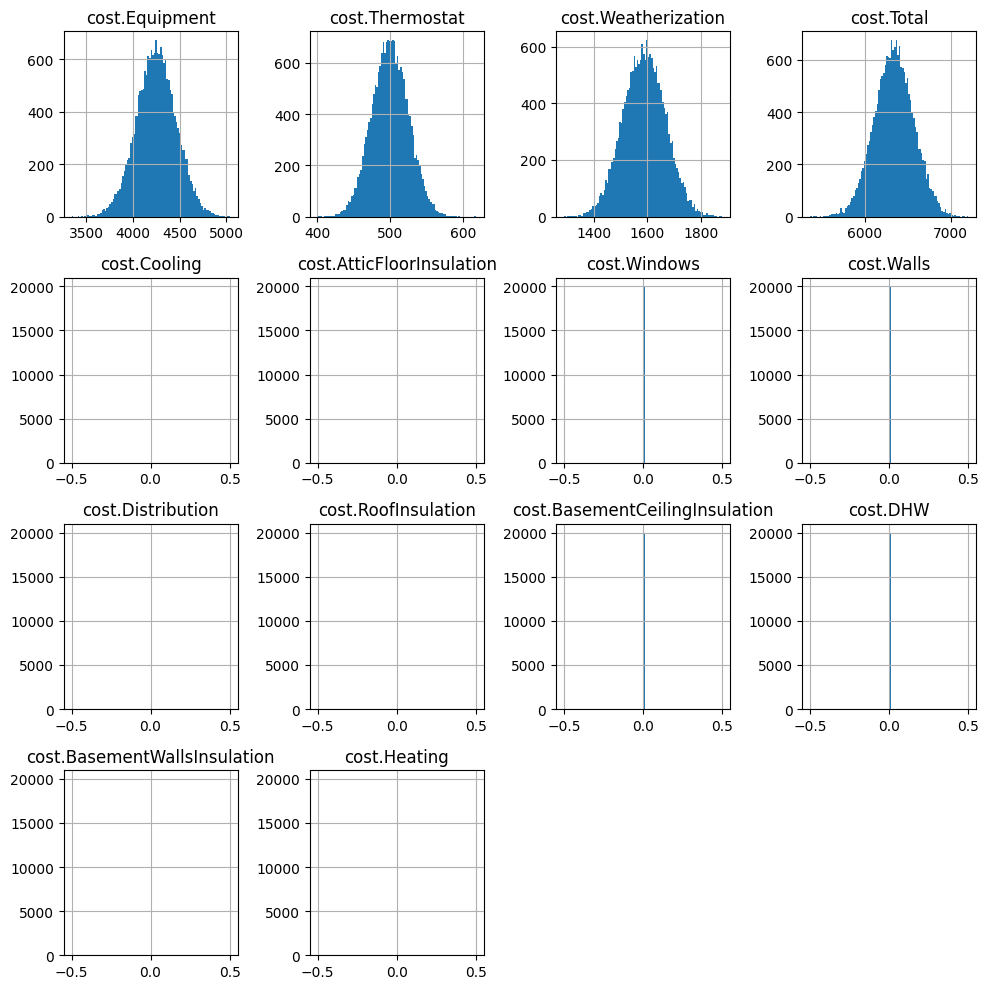

In [3]:
import matplotlib.pyplot as plt

# costs = savings_spec.compute_retrofit_costs(new_results.features, costs_reloaded)
retrofit_result = results["retrofit"]
costs = retrofit_result.costs
fig, ax = plt.subplots(figsize=(10, 10))
costs.hist(ax=ax, bins=100)
fig.tight_layout()
# costs

<Axes: >

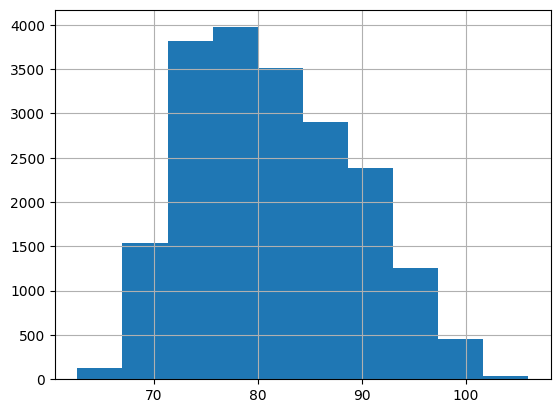

In [6]:
delta_results.totals.Normalized.EndUse.hist()

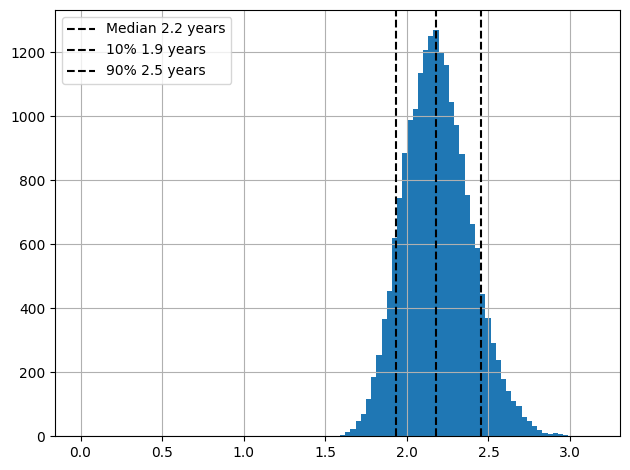

In [4]:
import numpy as np

# payback = savings_spec.compute_payback(costs, delta_results)
payback = retrofit_result.paybacks
fig, ax = plt.subplots()
payback.hist(bins=np.linspace(0, np.max(payback), 100), ax=ax)
ax.axvline(
    payback.median(),
    color="k",
    linestyle="--",
    label=f"Median {payback.median():.1f} years",
)
p10 = payback.quantile(0.1)
p90 = payback.quantile(0.9)
ax.axvline(p10, color="k", linestyle="--", label=f"10% {p10:.1f} years")
ax.axvline(p90, color="k", linestyle="--", label=f"90% {p90:.1f} years")
ax.legend()
fig.tight_layout()

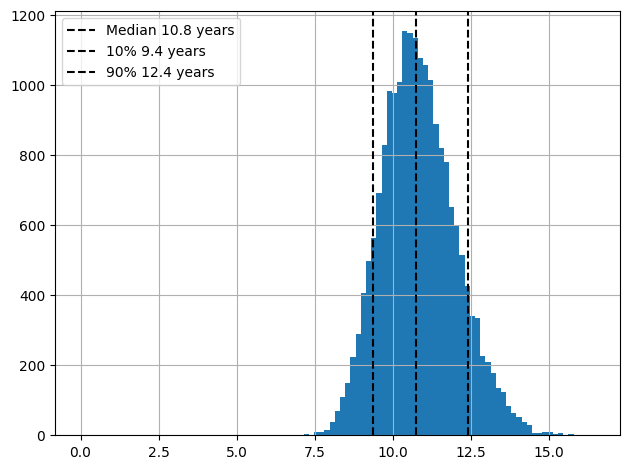

In [4]:
import numpy as np

# payback = savings_spec.compute_payback(costs, delta_results)
payback = retrofit_result.paybacks
fig, ax = plt.subplots()
payback.hist(bins=np.linspace(0, np.max(payback), 100), ax=ax)
ax.axvline(
    payback.median(),
    color="k",
    linestyle="--",
    label=f"Median {payback.median():.1f} years",
)
p10 = payback.quantile(0.1)
p90 = payback.quantile(0.9)
ax.axvline(p10, color="k", linestyle="--", label=f"10% {p10:.1f} years")
ax.axvline(p90, color="k", linestyle="--", label=f"90% {p90:.1f} years")
ax.legend()
fig.tight_layout()

# MISC OTHER

## Deriving scaling factors

In [19]:
# import sympy as sp

# n_floors = sp.symbols("N", positive=True, real=True, integer=True)
# roof_angle = sp.symbols("theta", positive=True, real=True)
# f2f_height = sp.symbols("h", positive=True, real=True)
# wwr = sp.symbols("W", positive=True, real=True)

# model_short_edge, model_long_edge = sp.symbols("x y", positive=True, real=True)
# model_fp_area = model_short_edge * model_long_edge
# model_gfa = model_fp_area * n_floors
# model_perimeter = 2 * (model_short_edge + model_long_edge)
# model_total_perimeter = model_perimeter * n_floors
# model_envelope_area = model_perimeter * f2f_height
# model_total_envelope_area = model_envelope_area * n_floors
# model_roof_run = model_short_edge / 2
# model_roof_rise = model_roof_run * sp.tan(roof_angle)
# model_roof_hypotenuse = sp.sqrt(model_roof_run**2 + model_roof_rise**2)
# model_roof_area = model_roof_hypotenuse * model_long_edge * 2
# model_window_area = model_total_envelope_area * wwr

# user_gfa = sp.symbols("GFA", positive=True, real=True)
# linear_scale_factor = sp.symbols("k", positive=True, real=True)

# new_fp_area = user_gfa / n_floors
# eq = sp.Eq(
#     new_fp_area,
#     (model_short_edge * linear_scale_factor) * (model_long_edge * linear_scale_factor),
# )
# linear_scale_factor_solution = sp.solve(eq, linear_scale_factor)[-1]


# # new_short_edge = model_short_edge * linear_scale_factor_solution
# # new_long_edge = model_long_edge * linear_scale_factor_solution
# new_short_edge = model_short_edge * linear_scale_factor
# new_long_edge = model_long_edge * linear_scale_factor
# new_fp_area = new_short_edge * new_long_edge
# new_gfa = new_fp_area * n_floors
# new_perimeter = 2 * (new_short_edge + new_long_edge)
# new_total_perimeter = new_perimeter * n_floors
# new_envelope_area = new_perimeter * f2f_height
# new_total_envelope_area = new_envelope_area * n_floors
# new_roof_run = new_short_edge / 2
# new_roof_rise = new_roof_run * sp.tan(roof_angle)
# new_roof_hypotenuse = sp.sqrt(new_roof_run**2 + new_roof_rise**2)
# new_roof_area = new_roof_hypotenuse * new_long_edge * 2
# new_window_area = new_total_envelope_area * wwr

# window_area_factor = (new_window_area / model_window_area).simplify()
# roof_area_factor = (new_roof_area / model_roof_area).simplify()
# envelope_area_factor = (new_envelope_area / model_envelope_area).simplify()
# total_perimeter_factor = (new_total_perimeter / model_total_perimeter).simplify()
# gfa_factor = (
#     (new_gfa / model_gfa)
#     .simplify()
#     .subs(linear_scale_factor_solution, linear_scale_factor)
#     .simplify()
# )
# footprint_area_factor = (new_fp_area / model_fp_area).simplify()

# observed_theta = 17 * sp.pi / 180
# observed_n_floors = 3
# observed_gfa = 254
# observed_short_edge = 7
# observed_long_edge = 10

# observed_roof_area_factor = (
#     roof_area_factor.subs(linear_scale_factor, linear_scale_factor_solution)
#     .simplify()
#     .subs(roof_angle, observed_theta)
#     .subs(n_floors, observed_n_floors)
#     .subs(user_gfa, observed_gfa)
#     .subs(model_short_edge, observed_short_edge)
#     .subs(model_long_edge, observed_long_edge)
# )
# observed_window_area_factor = (
#     window_area_factor.subs(linear_scale_factor, linear_scale_factor_solution)
#     .simplify()
#     .subs(roof_angle, observed_theta)
#     .subs(n_floors, observed_n_floors)
#     .subs(user_gfa, observed_gfa)
#     .subs(model_short_edge, observed_short_edge)
#     .subs(model_long_edge, observed_long_edge)
# )
# observed_gfa_ratio = observed_gfa / (
#     observed_short_edge * observed_long_edge * observed_n_floors
# )

# factors = {
#     "roof_area": roof_area_factor,
#     "window_area": window_area_factor,
#     "envelope_area": envelope_area_factor,
#     "total_perimeter": total_perimeter_factor,
#     "gfa": gfa_factor,
#     "footprint_area": footprint_area_factor,
# }

# factors


## NADA FILES

SHADING:BUILDING:DETAILED


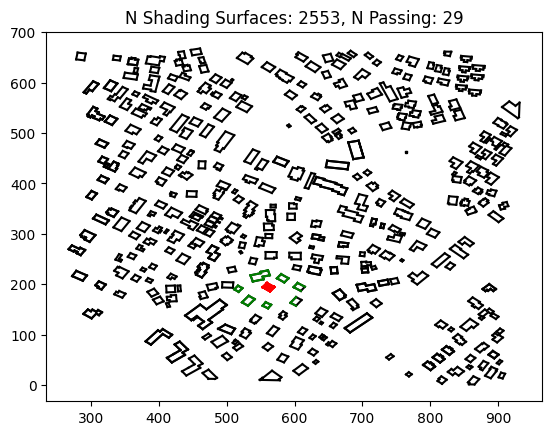

In [1]:
import tempfile
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

# from archetypal import IDF
from eppy.modeleditor import IDF

# set the idd for the version of the idf file
idd_path = "C:/EnergyPlusV22-2-0/Energy+.idd"
IDF.setiddname(idd_path)
# from geomeppy import IDF

idf_paths = list((Path("..") / "local_artifacts" / "C219_HELSINKI_G1").glob("*.idf"))
# idf_paths = list((Path("..") / "local_artifacts" / "C226_HELSINKI_G1").glob("*.idf"))
# idf_paths = list((Path("..") / "local_artifacts" / "C575_SINGAPORE_G1").glob("*.idf"))
# idf_paths = list((Path("..") / "local_artifacts" / "C1196_NY_G23").glob("*.idf"))
# idf_paths = list((Path("..") / "local_artifacts" / "C1_NEWDELHI_G1").glob("*.idf"))
# idf_paths = list((Path("..") / "local_artifacts" / "C1317_CAMBRIDGE_G0").glob("*.idf"))
# idf_paths = list(
#     (Path("..") / "local_artifacts" / "old-artifacts" / "C1_LISBON_G2").glob("*.idf")
# )
# idf_paths = list(
#     (Path("..") / "local_artifacts" / "old-artifacts" / "C2_LISBON_G12").glob("*.idf")
# )
# idf_paths = list(
#     (Path("..") / "local_artifacts" / "old-artifacts" / "C8_NY_G0").glob("*.idf")
# )
idf_path = np.random.choice(idf_paths)
idf_str = idf_path.read_text()
idf_str.replace("24.2", "22.2").replace("24.1", "22.2").replace("23.2", "22.2").replace(
    "23.1", "22.2"
)
with tempfile.TemporaryDirectory() as temp_dir:
    temp_dir = Path(temp_dir)
    with open(temp_dir / "temp.idf", "w") as f:
        f.write(idf_str)
        idf = IDF(temp_dir / "temp.idf")

        all_coords = []
        main_coords = []
        for key in idf.idfobjects:
            if "shading" in key.lower() and idf.idfobjects[key]:
                print(key)
                for obj in idf.idfobjects[key]:
                    coords = obj.coords
                    all_coords.append(np.array(coords)[:, :2])
            if "buildingsurface" in key.lower() and idf.idfobjects[key]:
                for obj in idf.idfobjects[key]:
                    coords = obj.coords
                    main_coords.append(np.array(coords)[:, :2])

        for coords in all_coords:
            plt.plot(coords[:, 0], coords[:, 1], "k-")
        # plt.title(
        #     f"N Shading Surfaces: {len(all_coords)}\nN Main Surfaces: {len(main_coords)}"
        # )
        for coords in main_coords:
            plt.plot(coords[:, 0], coords[:, 1], "r-")

        main_mean = np.concatenate(main_coords).mean(axis=0)

        n_passing = 0
        for coord in all_coords:
            centroid = np.mean(coord, axis=0)
            centroid_dist = np.linalg.norm(centroid - main_mean)
            if centroid_dist < 50:
                plt.plot(coord[:, 0], coord[:, 1], "g-")
                n_passing += 1
        # main_coords_avg_x =
        plt.title(f"N Shading Surfaces: {len(all_coords)}, N Passing: {n_passing}")

        plt.show()

In [10]:
import tempfile
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from eppy.modeleditor import IDF

idf_paths = list(Path("../temp/Cases").glob("**/*.idf"))

# path = np.random.choice(paths)
# set the idd for the version of the idf file
idd_path = "C:/EnergyPlusV22-2-0/Energy+.idd"
IDF.setiddname(idd_path)
# from geomeppy import IDF

  0%|          | 0/1000 [00:00<?, ?it/s]

0    1
Name: count, dtype: int64
0     7
25    4
Name: count, dtype: int64
0     16
25     5
Name: count, dtype: int64
0     22
25     8
50     1
Name: count, dtype: int64
0     29
25    11
50     1
Name: count, dtype: int64
0      34
25     14
50      2
200     1
Name: count, dtype: int64
0      40
25     18
50      2
200     1
Name: count, dtype: int64
0      47
25     21
50      2
200     1
Name: count, dtype: int64
0      52
25     24
50      3
200     1
275     1
Name: count, dtype: int64
0      59
25     27
50      3
200     1
275     1
Name: count, dtype: int64
0      67
25     28
50      3
75      1
200     1
275     1
Name: count, dtype: int64
0      74
25     31
50      3
75      1
200     1
275     1
Name: count, dtype: int64
0      81
25     32
50      4
75      1
150     1
200     1
275     1
Name: count, dtype: int64
0      85
25     37
50      4
75      1
150     1
200     2
275     1
Name: count, dtype: int64
0      91
25     38
50      5
75      3
150     1
200     2
2

(array([940.,  29.,   8.,  12.,   2.,   8.,   0.,   0.,   0.,   1.]),
 array([  5. ,  62.8, 120.6, 178.4, 236.2, 294. , 351.8, 409.6, 467.4,
        525.2, 583. ]),
 <BarContainer object of 10 artists>)

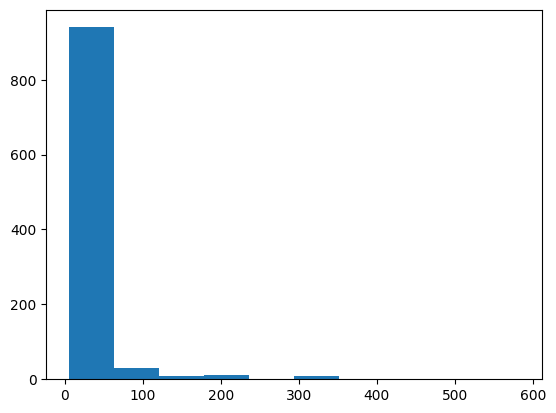

In [17]:
import pandas as pd

zone_counts = []
for i in tqdm(range(1000)):
    idf_path = np.random.choice(idf_paths)
    idf_str = idf_path.read_text()
    idf_str.replace("24.2", "22.2").replace("24.1", "22.2").replace(
        "23.2", "22.2"
    ).replace("23.1", "22.2")
    with tempfile.TemporaryDirectory() as temp_dir:
        temp_dir = Path(temp_dir)
        with open(temp_dir / "temp.idf", "w") as f:
            f.write(idf_str)
            idf = IDF(temp_dir / "temp.idf")
            n_zones = len(idf.idfobjects["ZONE"])
            zone_counts.append(n_zones)

    if i % 10 == 0:
        print(pd.Series((np.array(zone_counts) // 25) * 25).value_counts().sort_index())

plt.hist(zone_counts)

In [18]:
pd.Series((np.array(zone_counts) // 25) * 25).value_counts().sort_index()

0      714
25     214
50      27
75       8
100      6
125      3
150      2
175      4
200     11
225      1
250      1
275      1
300      3
350      4
575      1
Name: count, dtype: int64